In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seq2vec import Seq2VecHash

Using TensorFlow backend.


In [2]:
def load_clickstream(user_id, task_id):
    with open(f'./dataset/{user_id}.json') as f:
        return json.load(f)[task_id]['clickstream']

In [152]:
vector_length = 100
def compute_url_embedding2(user_id):
    clickstream = load_clickstream(user_id, 3)
    urls = []
    for obj in clickstream:
        urls.append(obj['current_url'])
    transformer = Seq2VecHash(vector_length=vector_length)
    result = transformer.transform(urls)
    return result

def compute_url_embedding3(task_id):
    clickstream = load_clickstream(2, task_id)
    urls = []
    for obj in clickstream:
        urls.append(obj['current_url'])
    transformer = Seq2VecHash(vector_length=vector_length)
    result = transformer.transform(urls)
    return result

In [153]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [154]:
results = []
for user_id in range(1, 22):
    results.append(compute_url_embedding2(user_id))

X = np.concatenate(results, axis=0)
y = []
for i, result in enumerate(results):
    y.append(np.ones(result.shape[0])+i)
    
y = np.concatenate(y, axis=0)

In [158]:
results_ = []
for task_id in range(0, 3):
    results_.append(compute_url_embedding3(task_id))

X_ = np.concatenate(results_, axis=0)
y_ = []
for i, result in enumerate(results_):
    y_.append(np.ones(result.shape[0])+i)
    
y_ = np.concatenate(y_, axis=0)


In [159]:
from matplotlib import offsetbox
from time import time

def plot_embedding(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i]/22),
                 fontdict={'weight': 'bold', 'size': 9})

Computing t-SNE embedding: cross-user


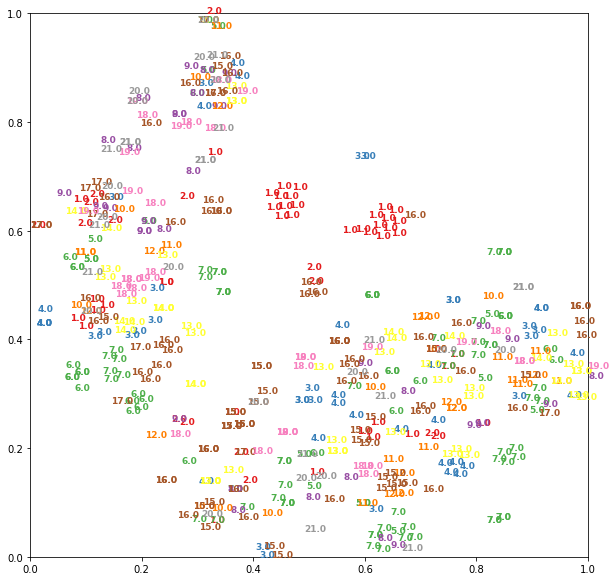

Computing t-SNE embedding: corss-task


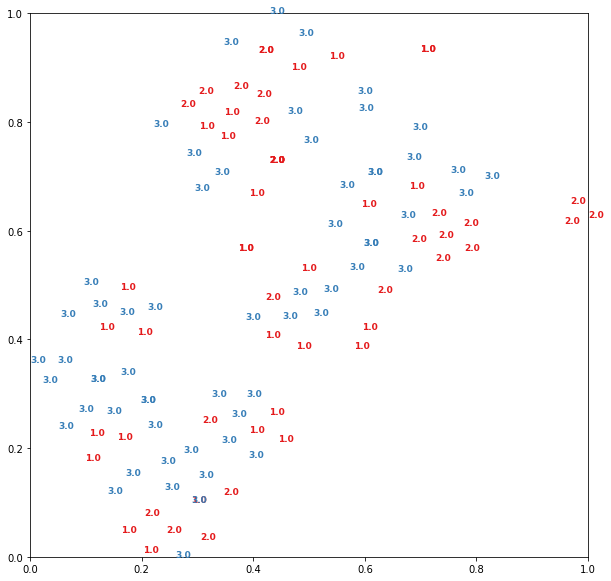

In [160]:
print("Computing t-SNE embedding: cross-user")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
# print(X_tsne)
plot_embedding(X_tsne, y)
plt.show()

print("Computing t-SNE embedding: corss-task")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_)
# print(X_tsne)
plot_embedding(X_tsne, y_)
plt.show()